In [1]:
from netCDF4 import Dataset as netcdf 
from scipy import signal
#import cdsapi
from pylab import *
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr


In [4]:
from affine import Affine
tif = xr.open_rasterio('/home/s1423313/Documents/Svalbard/Regions/Region_Masks/07_rgi60_Svalbard_corr_land_R1.tif')
tif

<xarray.DataArray (band: 1, y: 430, x: 487)>
[209410 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 80.47 80.46 80.45 80.44 ... 76.64 76.63 76.62 76.61
  * x        (x) float64 10.71 10.75 10.79 10.82 ... 28.1 28.14 28.17 28.21
Attributes:
    transform:      (0.036, 0.0, 10.6959, 0.0, -0.009, 80.47529999999999)
    crs:            +init=epsg:4326
    res:            (0.036, 0.009)
    is_tiled:       0
    nodatavals:     (nan,)
    descriptions:   ('Band 1',)
    AREA_OR_POINT:  Area
    Band_1:         Band 1

In [10]:
ncfile = netcdf('MARv3.11.2-6km-daily-ERA5-2000.nc')
ncfile.variables

OrderedDict([('X20_340', <class 'netCDF4._netCDF4.Variable'>
              float32 X20_340(X20_340)
                  units: km
                  long_name: x
                  point_spacing: even
                  axis: X
              unlimited dimensions: 
              current shape = (321,)
              filling off), ('Y20_218', <class 'netCDF4._netCDF4.Variable'>
              float32 Y20_218(Y20_218)
                  units: km
                  long_name: y
                  point_spacing: even
                  axis: Y
              unlimited dimensions: 
              current shape = (199,)
              filling off), ('LON', <class 'netCDF4._netCDF4.Variable'>
              float32 LON(Y20_218, X20_340)
                  units: degrees
                  long_name: Longitude
                  history: From ICE.x42.2020.01.01-05
              unlimited dimensions: 
              current shape = (199, 321)
              filling off), ('LAT', <class 'netCDF4._netCDF4.Variable'>

In [43]:
#ncfile = netcdf('MARv3.11.2-6km-daily-ERA5-2000.nc')
#ncfile.variables
ds= xr.open_dataarray('MARv3.11.2-6km-daily-ERA5-2000.nc','SMB')
ds

OSError: [Errno group not found: SMB] 'SMB'

In [34]:
ds_SMB= xr.DataArray(ds.SMB[0][0].values,dims= ('lat','lon'),coords=dict(lat=ds.LAT.values,lon=ds.LON.values))

MissingDimensionsError: cannot set variable 'lat' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [19]:
data=SMB_test2
SMB_ds=xr.DataArray(data,coords=[("Lat",lat),("Lon",lon)])
ds_SMB=SMB_ds.to_dataset(name="SMB")

In [115]:
print(ds2.SMB[0][0].sel(Y20_218=ny, X20_340=nx).LAT[0][0])
print(ds2.SMB[0][0].sel(Y20_218=ny, X20_340=nx).LON[0][0])

<xarray.DataArray 'LAT' ()>
array(79.480156, dtype=float32)
Coordinates:
    X20_340    float32 -624.00006
    Y20_218    float32 342.00003
    LON        float32 ...
    LAT        float32 ...
    TIME       datetime64[ns] 2000-01-01T12:00:00
    SECTOR1_1  float32 1.0
Attributes:
    units:      degrees
    long_name:  Latitude
    history:    From ICE.x42.2020.01.01-05
<xarray.DataArray 'LON' ()>
array(22.671816, dtype=float32)
Coordinates:
    X20_340    float32 -624.00006
    Y20_218    float32 342.00003
    LON        float32 ...
    LAT        float32 ...
    TIME       datetime64[ns] 2000-01-01T12:00:00
    SECTOR1_1  float32 1.0
Attributes:
    units:      degrees
    long_name:  Longitude
    history:    From ICE.x42.2020.01.01-05


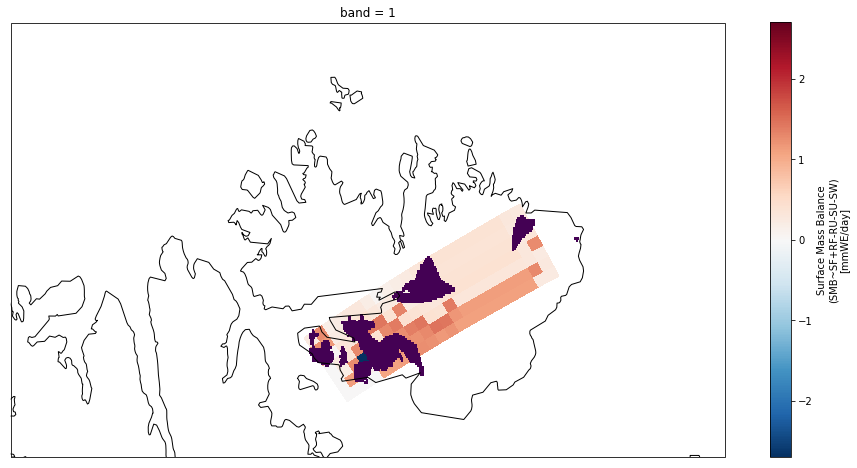

In [66]:

#Plotting with new coordinate lat and lon
plt.figure(figsize=(16,8))
plt.title('Land Terminating Region 1', fontsize=16)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
ds2.SMB[0][0].sel(Y20_218=ny, X20_340=nx).sortby('X20_340').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='LON',y='LAT', add_colorbar=True)
ds2.mask2[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='x',y='y', add_colorbar=False)
ax.coastlines()
ax.set_extent([12, 31,79,81],ccrs.PlateCarree())

ValueError: too many values to unpack (expected 2)

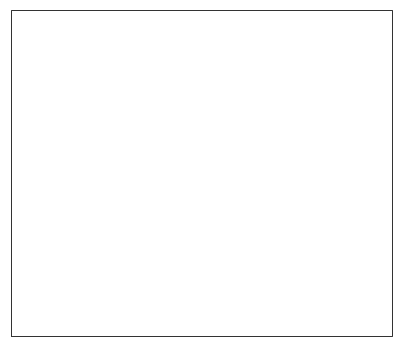

In [114]:
#Plotting with new coordinate lat and lon
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
tif.where(tif==1,drop=True).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),x='x',y='y', add_colorbar=True)
#ds2.mask2[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='x',y='y', add_colorbar=False)
ax.coastlines()
ax.set_extent([15, 30,79.3,81],ccrs.PlateCarree())

In [ ]:
#Plotting with new coordinate lat and lon
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_global()
ds2.SMB[0][0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='LON',y='LAT', add_colorbar=True)
ds2.mask2[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='x',y='y', add_colorbar=False)
ax.coastlines()
ax.set_extent([15, 30,79.3,81],ccrs.PlateCarree())


In [113]:
tif.where(tif==1,drop=True)

<xarray.DataArray (band: 1, y: 79, x: 122)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 80.16 80.15 80.14 80.13 ... 79.4 79.39 79.38 79.37
  * x        (x) float64 19.97 20.0 20.04 20.07 ... 25.91 27.02 27.06 27.09
Attributes:
    transform:      (0.036, 0.0, 10.6959, 0.0, -0.009, 80.47529999999999)
    crs:            +init=epsg:4326
    res:            (0.036, 0.009)
    is_tiled:       0
    nodatavals:     (nan,)
    descriptions:   ('Band 1',)
    AREA_OR_POINT:  Area
    Band_1:         Band 1

In [ ]:
#testing to see what is produced in simplest plotting
SMB_test_ts = ds2['SMB'].groupby('TIME.day').mean(dim=('Y20_218','X20_340'))
SMB_test_map = ds2['SMB'].groupby('TIME.year').mean(dim='TIME')

In [ ]:
SMB_test_ts.plot()

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(14,4))
ds.LAT.plot(ax=ax1)
ds2.y.plot(ax=ax1)
ds.LON.plot(ax=ax2)

In [ ]:
ds.SMB[0][0].plot()

In [2]:
from affine import Affine
tif = xr.open_rasterio('/home/s1423313/Documents/Svalbard/Regions/Region_Masks/07_rgi60_Svalbard_corr_land_R1.tif')

In [ ]:
'/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Years/Svalbard_2001.mat'